In [1]:
# 전이학습에 대하야 알아봅시다
# 비학습된 Pretrained Network VGG16을 이용해 보는것

from tensorflow.keras.applications import VGG16

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# ImageDataGenerator 객체 생성
Train_Datagen = ImageDataGenerator(rescale=1/255)
Test_Datagen = ImageDataGenerator(rescale=1/255)

In [4]:
train_dir = './data/train'
test_dir = './data/test'

In [5]:
# ImageDataGenerator 설정

train_generator = Train_Datagen.flow_from_directory(
    train_dir,               # 학습용 이미지를 가져올 폴더
    classes=['paper','rock','scissors'], # cats 폴더의 이미지 label을 0으로 
                             # dogs 폴더의 이미지는 label을 1으로
    target_size=(150,150),   # 이미지 resize
    batch_size=12,           # 한번에 20개의 이미지만 가져와서 학습
)


test_generator = Test_Datagen.flow_from_directory(
    test_dir,               # 학습용 이미지를 가져올 폴더
    classes=['paper','rock','scissors'], # cats 폴더의 이미지 label을 0으로 
                             # dogs 폴더의 이미지는 label을 1으로
    target_size=(150,150),   # 이미지 resize
    batch_size=12,           # 한번에 10개의 이미지만 가져와서 학습
)

Found 2160 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
model = Sequential()
# Convolution
model.add(Conv2D(
    filters=16,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))
model.add(Dropout(0.2))

In [9]:
# FC layer(DNN) 의: input layer
model.add(Flatten(input_shape=())) # 전체 4차원 에서 2차원으로 바꿔주는것
# hidden Layer
model.add(Dense(units=64, activation='relu'))
# output layer
model.add(Dense(units=3, activation='softmax'))

In [10]:
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
# 설정을 모두 마치었으면 모델 학습
history = model.fit(train_generator,
                    steps_per_epoch = 180,
                    epochs = 10,
                    verbose= 1,
                    validation_data = test_generator, validation_steps=31)

Epoch 1/10
180/180 [==============================] - 17s 92ms/step - loss: 0.3570 - accuracy: 0.8394 - val_loss: 0.7731 - val_accuracy: 0.7473
Epoch 2/10
180/180 [==============================] - 13s 74ms/step - loss: 0.0285 - accuracy: 0.9926 - val_loss: 0.6682 - val_accuracy: 0.7312
Epoch 3/10
180/180 [==============================] - 13s 71ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.9369 - val_accuracy: 0.7984
Epoch 4/10
180/180 [==============================] - 13s 74ms/step - loss: 2.2339e-04 - accuracy: 1.0000 - val_loss: 0.8723 - val_accuracy: 0.7984
Epoch 5/10
180/180 [==============================] - 14s 75ms/step - loss: 5.7224e-05 - accuracy: 1.0000 - val_loss: 0.9536 - val_accuracy: 0.8011
Epoch 6/10
180/180 [==============================] - 13s 72ms/step - loss: 4.0057e-05 - accuracy: 1.0000 - val_loss: 0.9672 - val_accuracy: 0.7984
Epoch 7/10
180/180 [==============================] - 13s 73ms/step - loss: 2.8397e-05 - accuracy: 1.0000 - val_loss: 0.9750

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 16)    448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 16)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 64)   0

In [13]:
model.evaluate(test_generator)

31/31 [==============================] - 1s 16ms/step - loss: 0.9823 - accuracy: 0.8038


[0.9822606444358826, 0.8037634491920471]

In [14]:
import matplotlib.pyplot as plt

In [15]:
acc = history.history['accuracy']
loss= history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [16]:
epochs = range(len(acc))

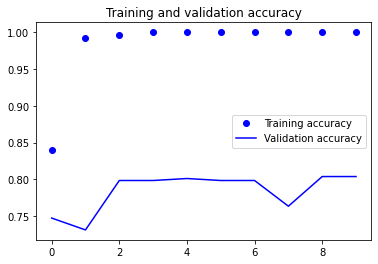

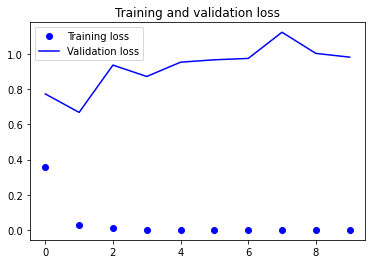

In [17]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()